In [2]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


  DEPRECATION: sklearn is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [3]:
# импортируйте нужные библиотеки
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# сгенерируйте линейно разделимую выборку для задачи бинарной классификации
X, y = make_blobs(n_samples=1000, centers=2, random_state=0, cluster_std=1, center_box = (-20, 20), shuffle=1)
y[y == 0] = 0
tmp = np.ones(len(X))
y = tmp * y

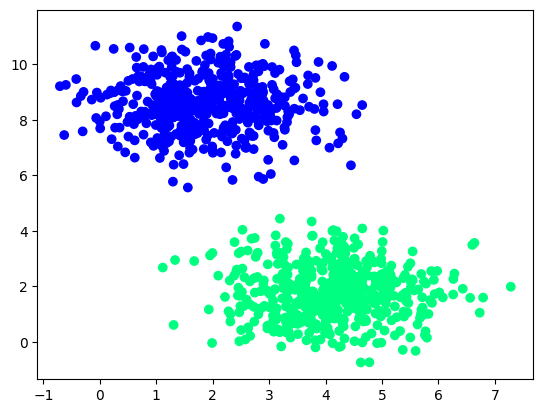

In [685]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

# Логистическая регрессия

Конечным результатом задачи классификации является разбиение множества объектов на классы. Давайте усложним задачу и будем предсказывать не конкретные классы, а вероятности принадлежать им, например, для бинарной классификации мы будем предсказывать одно число, которое будет соответствовать вероятности принадлежать положительному классу. \
Такого результата можно достичь, если мы будем строить линейную регрессию над некоторыми признаками, а затем её результат переводить в отрезок $[0;1]$. В этом нам поможет сигмоидная функция, которая имеет вид:
<p style="text-align: center;"> $f(z) = \dfrac{1}{1 + e^{-z}}$ </p>

![sigmoid.webp](https://cmertin.github.io/images/2016/11/11_17-Loan_Approvals/Sigmoid_Function.png)
<p style="text-align: center;"></p>

Моделью логистической регрессии назовём функцию от весов и объекта вида:

<p style="text-align: center;"> $a(w, x) = \dfrac{1}{1 + e^{-w_0 - w_1x_1 + ... + w_mx_m}}$ </p>

Обучение данной модели происходит за счет кросс-энтропийной или логистическая функции потерь :
<p style="text-align: center;"> $-\sum\limits_{i=1}^{n}(y_ilog(a_i) + (1 - y_i)log(1 - a_i))$ </p>
где $a_i = a(w, x_i)$

#### Задание №1. Выведите шаг градиентного спуска для логистической функции потерь (приложить фото)
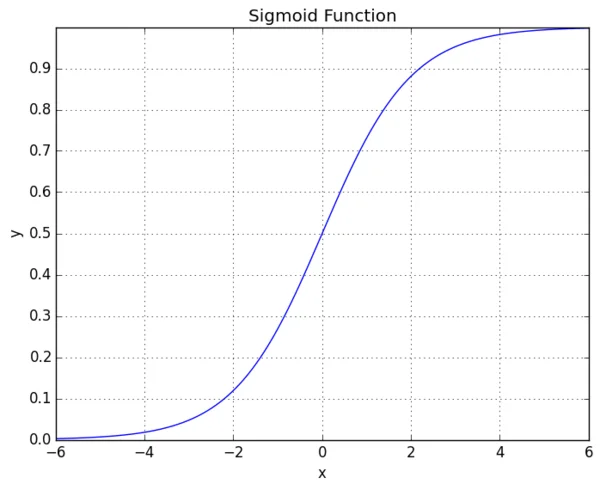

In [704]:
from IPython.display import Image
  
Image(url="step_GD.jpg", width=2000, height=2000)

#### Задание №2. Напишите собственную логистическую регрессию

In [699]:
class MyLogRegression():
    
    def __init__(self, num_steps=1000, lr=10):
        self.num_steps = num_steps
        self.lr = lr
        #self.w_0 = 1
        #self.w_1 = 1
        #self.w_2 = 1
        w = np.random.randn(X.shape[1] + 1)
        self.w = w
    def sigm(self, X):
        f = self.w[0] + self.w[1:]*X
        return 1/(1+np.exp(-sum(f)))
    def fit(self, X, Y):
        koef = self.lr/np.log(10)
        for _ in range(self.num_steps):
            k0 = koef*sum([self.sigm(X[i]) - Y[i] for i in range(len(X))])
            k1 = koef*sum([(self.sigm(X[i]) - Y[i])*X[i] for i in range(len(X))])
            self.w = self.w - np.append(k0,k1)
        return self

    
    def predict(self, X):
        out = np.array([])
        for i in range(len(X)):
            k = self.sigm(X[i])
            out = np.append(out, k)
        return out

In [700]:
x_train, x_test, y_train, y_test = train_test_split(X, y)
own_model = MyLogRegression().fit(x_train, y_train)
y_pred_my = own_model.predict(x_test)
y_pred_my


C:\Users\tmans\AppData\Local\Temp\ipykernel_21236\2408360933.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-sum(f)))


array([1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0.

#### Задание №3. Сравните свою логистическую регрессию с аналогичной моделью из sklearn на сгенерированном датасете, опираясь на Accuracy. Баллы за задание: 10 - Accuracy > 99, 5 - Accuracy > 85, 0 - иначе

In [701]:
reg = linear_model.LogisticRegression()
reg.fit(x_train, y_train)
y_pred_lib = reg.predict(x_test)
accuracy_score(y_pred_my, y_pred_lib)

1.0